<a href="https://colab.research.google.com/github/Saxena224pawan/AmazonSharePriceAnalysisProphet/blob/master/Amazon_Share_Price_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install fbprophet

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import fbprophet as fbp
from sklearn.metrics import mean_squared_error, mean_absolute_error
plt.style.use('fivethirtyeight') 


In [ ]:
df = pd.read_csv('sample_data/AMZN.csv')
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2015-07-21,487.899994,488.880005,482.549988,488.000000,488.000000,3181800
1,2015-07-22,485.989990,492.500000,484.899994,488.269989,488.269989,3114900
2,2015-07-23,491.660004,491.660004,475.700012,482.179993,482.179993,9374400
3,2015-07-24,578.989990,580.570007,529.349976,529.419983,529.419983,21909400
4,2015-07-27,527.750000,544.950012,526.599976,531.409973,531.409973,7491000


In [ ]:
df[['ds','y']] = df[['Date','Adj Close']]
df  =df[['ds','y']]


In [ ]:
df.head()


,ds,y
0,2015-07-21,488.000000
1,2015-07-22,488.269989
2,2015-07-23,482.179993
3,2015-07-24,529.419983
4,2015-07-27,531.409973


In [ ]:
split_date= "2019-07-21"
df_train  = df.loc[df.ds <= split_date].copy()
df_test  = df.loc[df.ds > split_date].copy()


In [ ]:
df_train.tail()


,ds,y
1002,2019-07-15,2020.989990
1003,2019-07-16,2009.900024
1004,2019-07-17,1992.030029
1005,2019-07-18,1977.900024
1006,2019-07-19,1964.520020


In [ ]:
df_test.tail()

,ds,y
1254,2020-07-14,3084.000000
1255,2020-07-15,3008.870117
1256,2020-07-16,2999.899902
1257,2020-07-17,2961.969971
1258,2020-07-20,3196.840088


In [ ]:
model = fbp.Prophet()

In [ ]:
model.fit(df_train)

INFO:numexpr.utils:NumExpr defaulting to 2 threads.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [ ]:
forecast = model.predict(df_test)
forecast.tail()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
247,2020-07-14,1992.862925,1517.810330,2628.828473,1416.056481,2531.310110,93.536964,93.536964,93.536964,-25.535936,-25.535936,-25.535936,119.072900,119.072900,119.072900,0.0,0.0,0.0,2086.399889
248,2020-07-15,1993.215324,1506.927291,2637.286187,1414.264875,2533.044768,97.405883,97.405883,97.405883,-25.138654,-25.138654,-25.138654,122.544537,122.544537,122.544537,0.0,0.0,0.0,2090.621207
249,2020-07-16,1993.567723,1518.066241,2621.538480,1412.543875,2534.757984,100.236350,100.236350,100.236350,-25.549805,-25.549805,-25.549805,125.786155,125.786155,125.786155,0.0,0.0,0.0,2093.804073
250,2020-07-17,1993.920121,1512.297876,2639.613473,1410.981092,2536.291861,99.309824,99.309824,99.309824,-29.445843,-29.445843,-29.445843,128.755666,128.755666,128.755666,0.0,0.0,0.0,2093.229945
251,2020-07-20,1994.977318,1520.083286,2654.622685,1407.172379,2541.235255,104.649308,104.649308,104.649308,-31.050560,-31.050560,-31.050560,135.699868,135.699868,135.699868,0.0,0.0,0.0,2099.626626


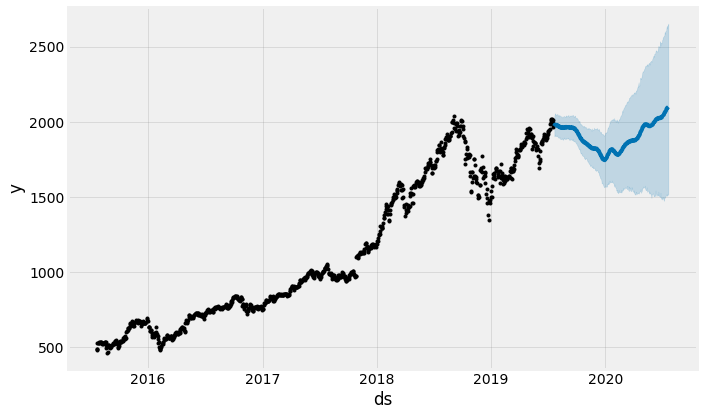

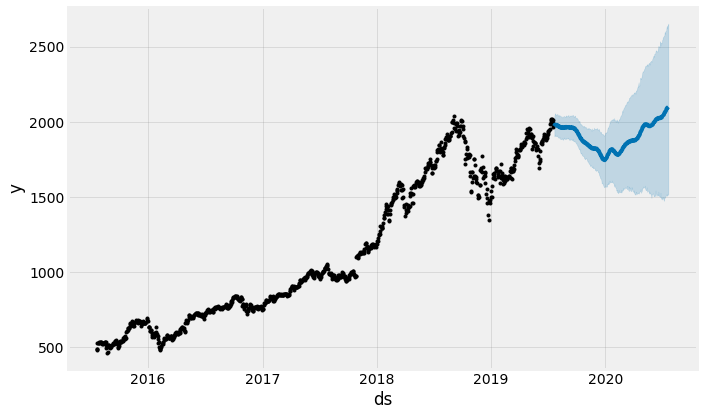

In [ ]:
model.plot(forecast)

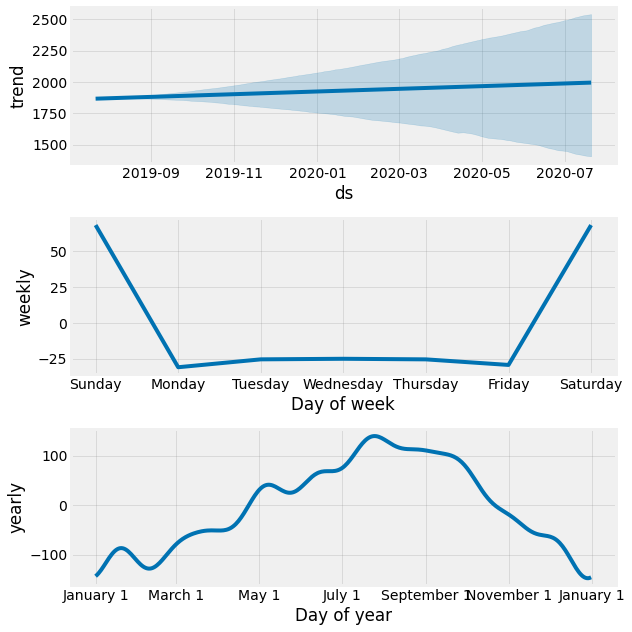

In [ ]:
model.plot_components(forecast);


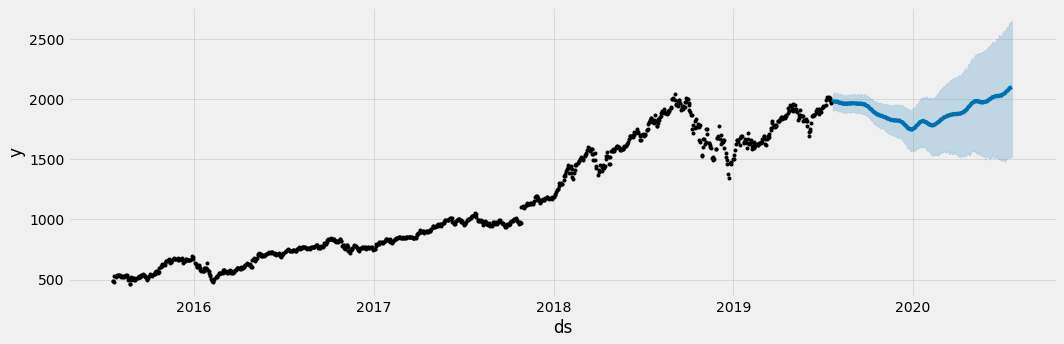

In [ ]:
# Plot the forecast
f, ax = plt.subplots(1)
f.set_figheight(5)
f.set_figwidth(15)
fig = model.plot(forecast, ax=ax)
plt.show()


In [ ]:
df_train

,ds,y
0,2015-07-21,488.000000
1,2015-07-22,488.269989
2,2015-07-23,482.179993
3,2015-07-24,529.419983
4,2015-07-27,531.409973
...,...,...
1002,2019-07-15,2020.989990
1003,2019-07-16,2009.900024
1004,2019-07-17,1992.030029
1005,2019-07-18,1977.900024


In [ ]:
df_test

,ds,y
1007,2019-07-22,1985.630005
1008,2019-07-23,1994.489990
1009,2019-07-24,2000.810059
1010,2019-07-25,1973.819946
1011,2019-07-26,1943.050049
...,...,...
1254,2020-07-14,3084.000000
1255,2020-07-15,3008.870117
1256,2020-07-16,2999.899902
1257,2020-07-17,2961.969971


In [ ]:
mean_squared_error(y_true= df_test["y"],y_pred = forecast['yhat'])

121417.80253038534

In [ ]:
print("Mean Squared Error (MSE):",mean_squared_error(y_true= df_test["y"],y_pred = forecast['yhat']))
print("Mean Absolute Error (MAE):",mean_absolute_error(y_true= df_test["y"],y_pred = forecast['yhat']))


Mean Squared Error (MSE): 121417.80253038534
Mean Absolute Error (MSE): 246.57694290710793


In [ ]:
def mean_abs_perc_err(y_true, y_pred): 
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

print("Mean Absolute % Error (MAPE): ", mean_abs_perc_err(y_true=np.asarray(df_test["y"]),y_pred = np.asarray(forecast['yhat'])))

Mean Absolute % Error (MAPE):  10.693787212532687
